In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import ndimage

In [2]:
fig_path = '../DMD_inputs'

imgs = []

for i in range(5):
    width = pow(2, i)
    img = cv.imread(f'{fig_path}/line_{width}px.bmp', cv.IMREAD_GRAYSCALE)
    imgs.append(img)

h, w = imgs[0].shape

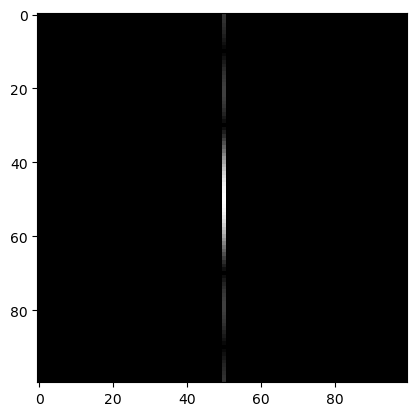

In [5]:
square = np.zeros((100, 100), dtype=np.uint8)
square[48:53, :] = 255
test = np.fft.fft2(square)
test = np.fft.fftshift(test)
test = np.abs(test)
# test = np.log(test + 1)
# print(test[0,:])
plt.imshow(test, cmap='gray')

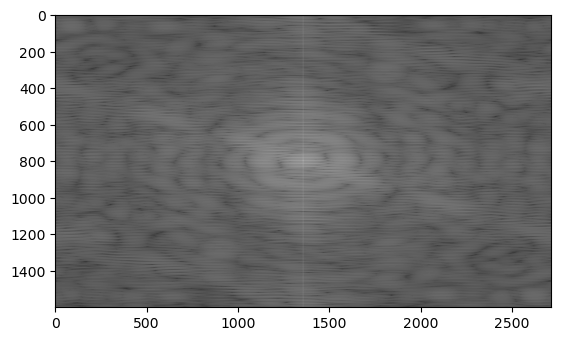

In [403]:
test = cv.imread(f'{fig_path}/678_Block.bmp', cv.IMREAD_GRAYSCALE)
# plt.imshow(test, cmap='gray')
test = np.fft.fft2(test)
test = np.fft.fftshift(test)
test = np.abs(test)
test = np.log(test + 1)
plt.imshow(test, cmap='gray')

In [405]:
ffted_imgs = []
for img in imgs:
    print(np.mean(img))
    ffted_img = np.fft.fft2(img)
    ffted_img = np.fft.fftshift(ffted_img)
    ffted_imgs.append(np.abs(ffted_img))

fft_verts = []
for img in ffted_imgs:
    fft_vert = img[:, w//2]
    fft_verts.append(fft_vert)

0.159375
0.31875
0.6375
1.275
2.55


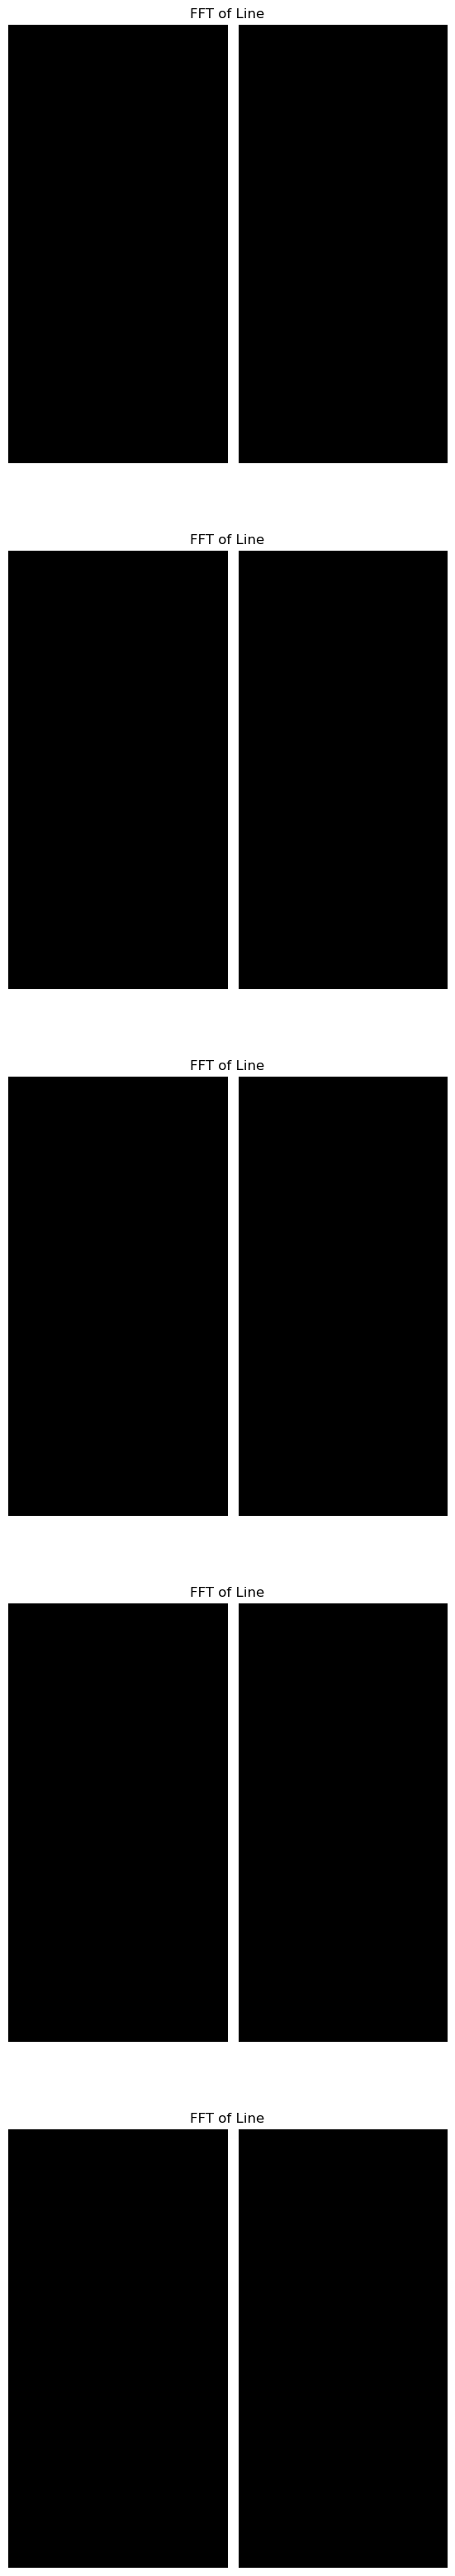

In [406]:
fig, axs = plt.subplots(5, 1, figsize=(10, 40))
for i, img in enumerate(ffted_imgs):
    axs[i].imshow(np.log(img + 1)[h//2 -20: h//2 + 20, w//2 - 20: w//2 + 20], cmap='gray')
    axs[i].set_title('FFT of Line')
    axs[i].axis('off')

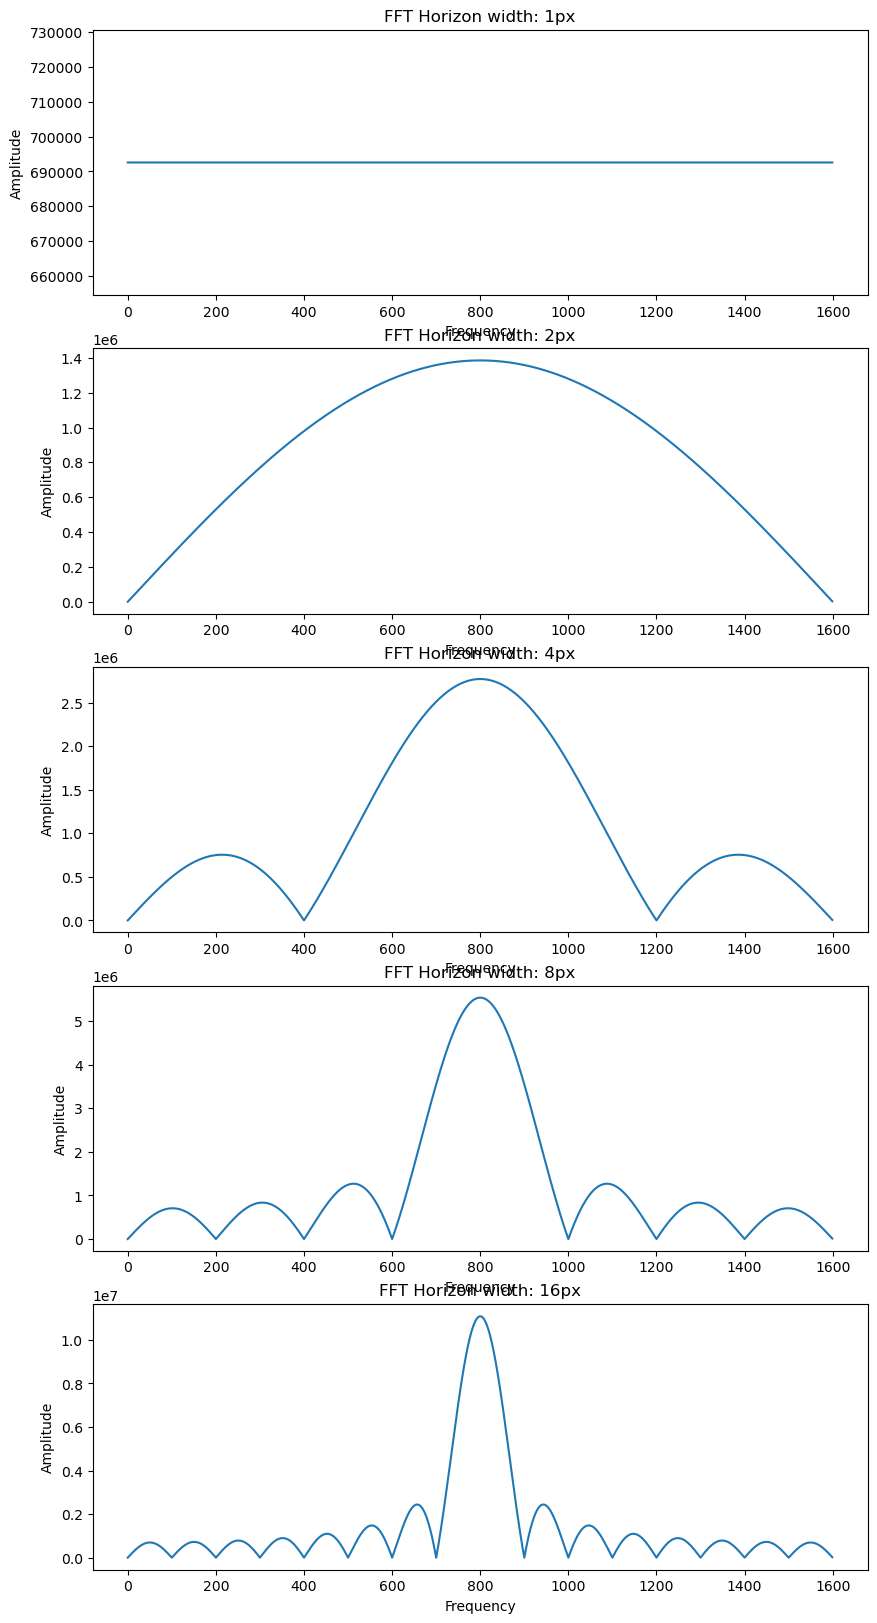

In [410]:
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
for i, horizon in enumerate(fft_verts):
    axs[i].plot(horizon)
    axs[i].set_title(f'FFT Horizon width: {pow(2, i)}px')
    axs[i].set_xlabel('Frequency')
    axs[i].set_ylabel('Amplitude')
plt.show()

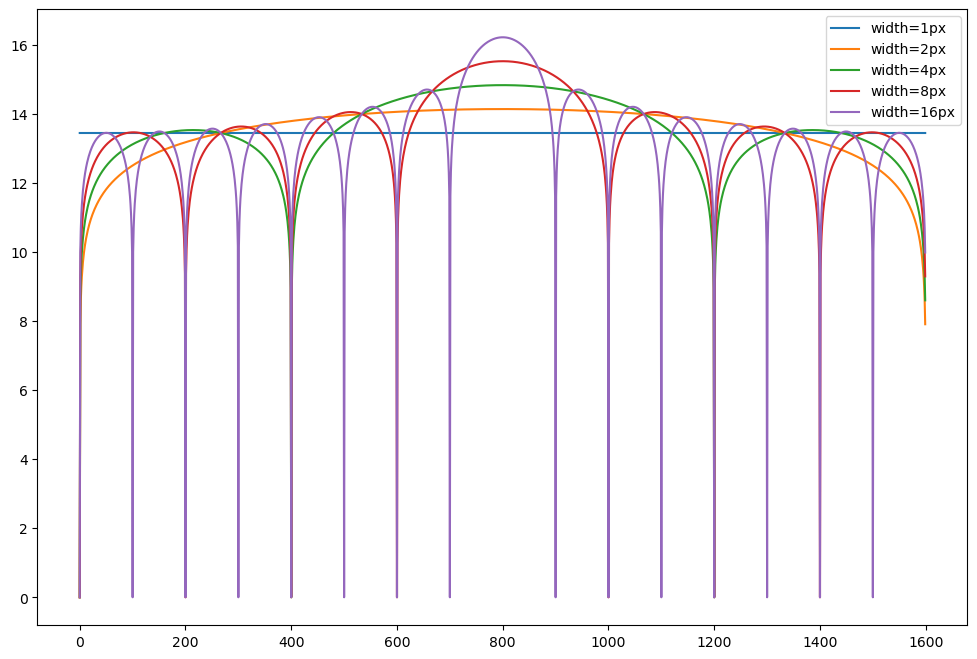

In [376]:
plt.figure(figsize=(12, 8))
# put all horizons in one plot
for i, horizon in enumerate(fft_verts):
    plt.plot(np.log(horizon + 1), label=f'width={pow(2, i)}px')
plt.legend()
plt.show()

In [377]:
shot_path = '../laser_shots/line_far_away'

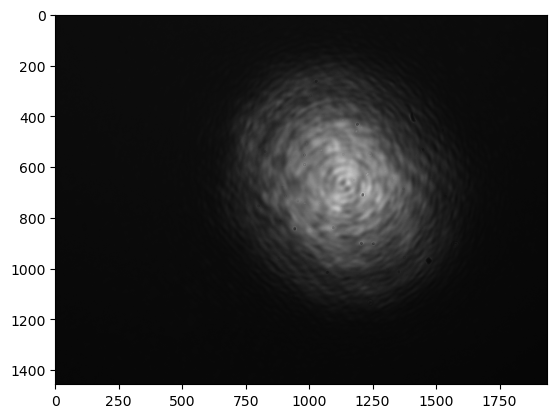

In [378]:
imgs = []

for i in range(5):
    width = pow(2, i)
    img = cv.imread(f'{shot_path}/raw_{width}px.png', cv.IMREAD_GRAYSCALE)
    imgs.append(img)

plt.imshow(imgs[0], cmap='gray')

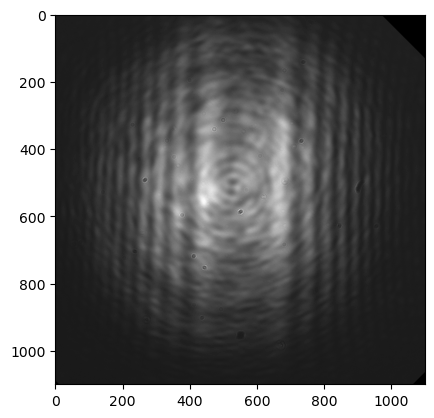

In [380]:
test = ndimage.rotate(imgs[4], -45, reshape=False)
test = test[300: 1400, 600: 1700]
plt.imshow(test, cmap='gray')

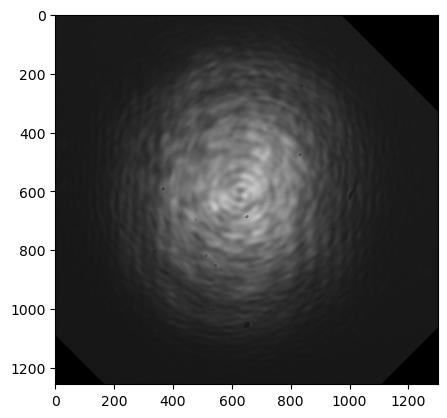

In [381]:
# crop the image and rotate it 46 degrees ccw
processed_imgs = []
for img in imgs:
    processed = ndimage.rotate(img, -45, reshape=False)
    processed = processed[200: 1500, 500: 1800]
    processed_imgs.append(processed)

plt.imshow(processed_imgs[0], cmap='gray')

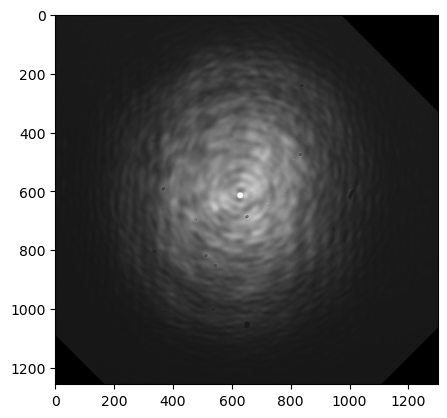

In [382]:
# test on center point
capture_h, capture_w = processed_imgs[0].shape
middle_pos = (capture_h // 2, capture_w // 2 - 35)
to_show = processed_imgs[0].copy()
cv.circle(to_show, middle_pos, 10, 255, -1)
plt.imshow(to_show, cmap='gray')

cam_horizons = [img[middle_pos[0], :] for img in processed_imgs]

In [383]:
final_h, final_w = max(h, capture_h), max(w, capture_w)
print(final_h, final_w)
# fill the smaller horizons with zeros on both sides
for i in range(5):
    if len(fft_verts[i]) < final_w:
        replacement = np.zeros(final_w, dtype=np.float64)
        replacement[final_w // 2 - len(fft_verts[i]) // 2: final_w // 2 + len(fft_verts[i]) // 2] = fft_verts[i]
        fft_verts[i] = replacement
    if len(cam_horizons[i]) < final_w:
        replacement = np.zeros(final_w, dtype=np.float64)
        replacement[final_w // 2 - len(cam_horizons[i]) // 2: final_w // 2 + len(cam_horizons[i]) // 2] = cam_horizons[i]
        cam_horizons[i] = replacement

1600 2716


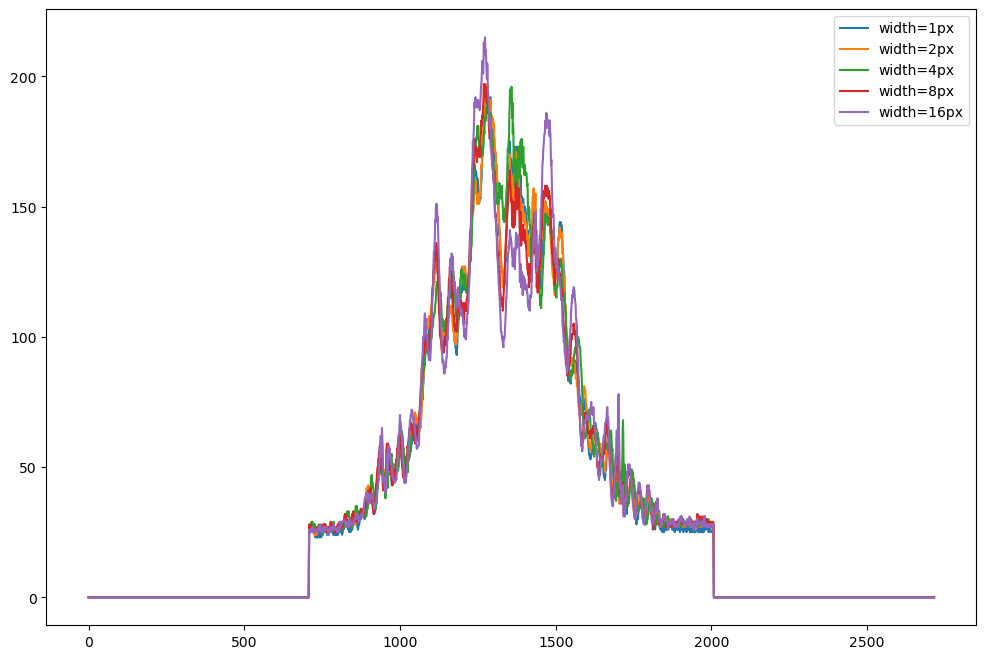

In [384]:
plt.figure(figsize=(12, 8))
# put all horizons in one plot
for i, horizon in enumerate(cam_horizons):
    plt.plot(horizon, label=f'width={pow(2, i)}px')
plt.legend()
plt.show()

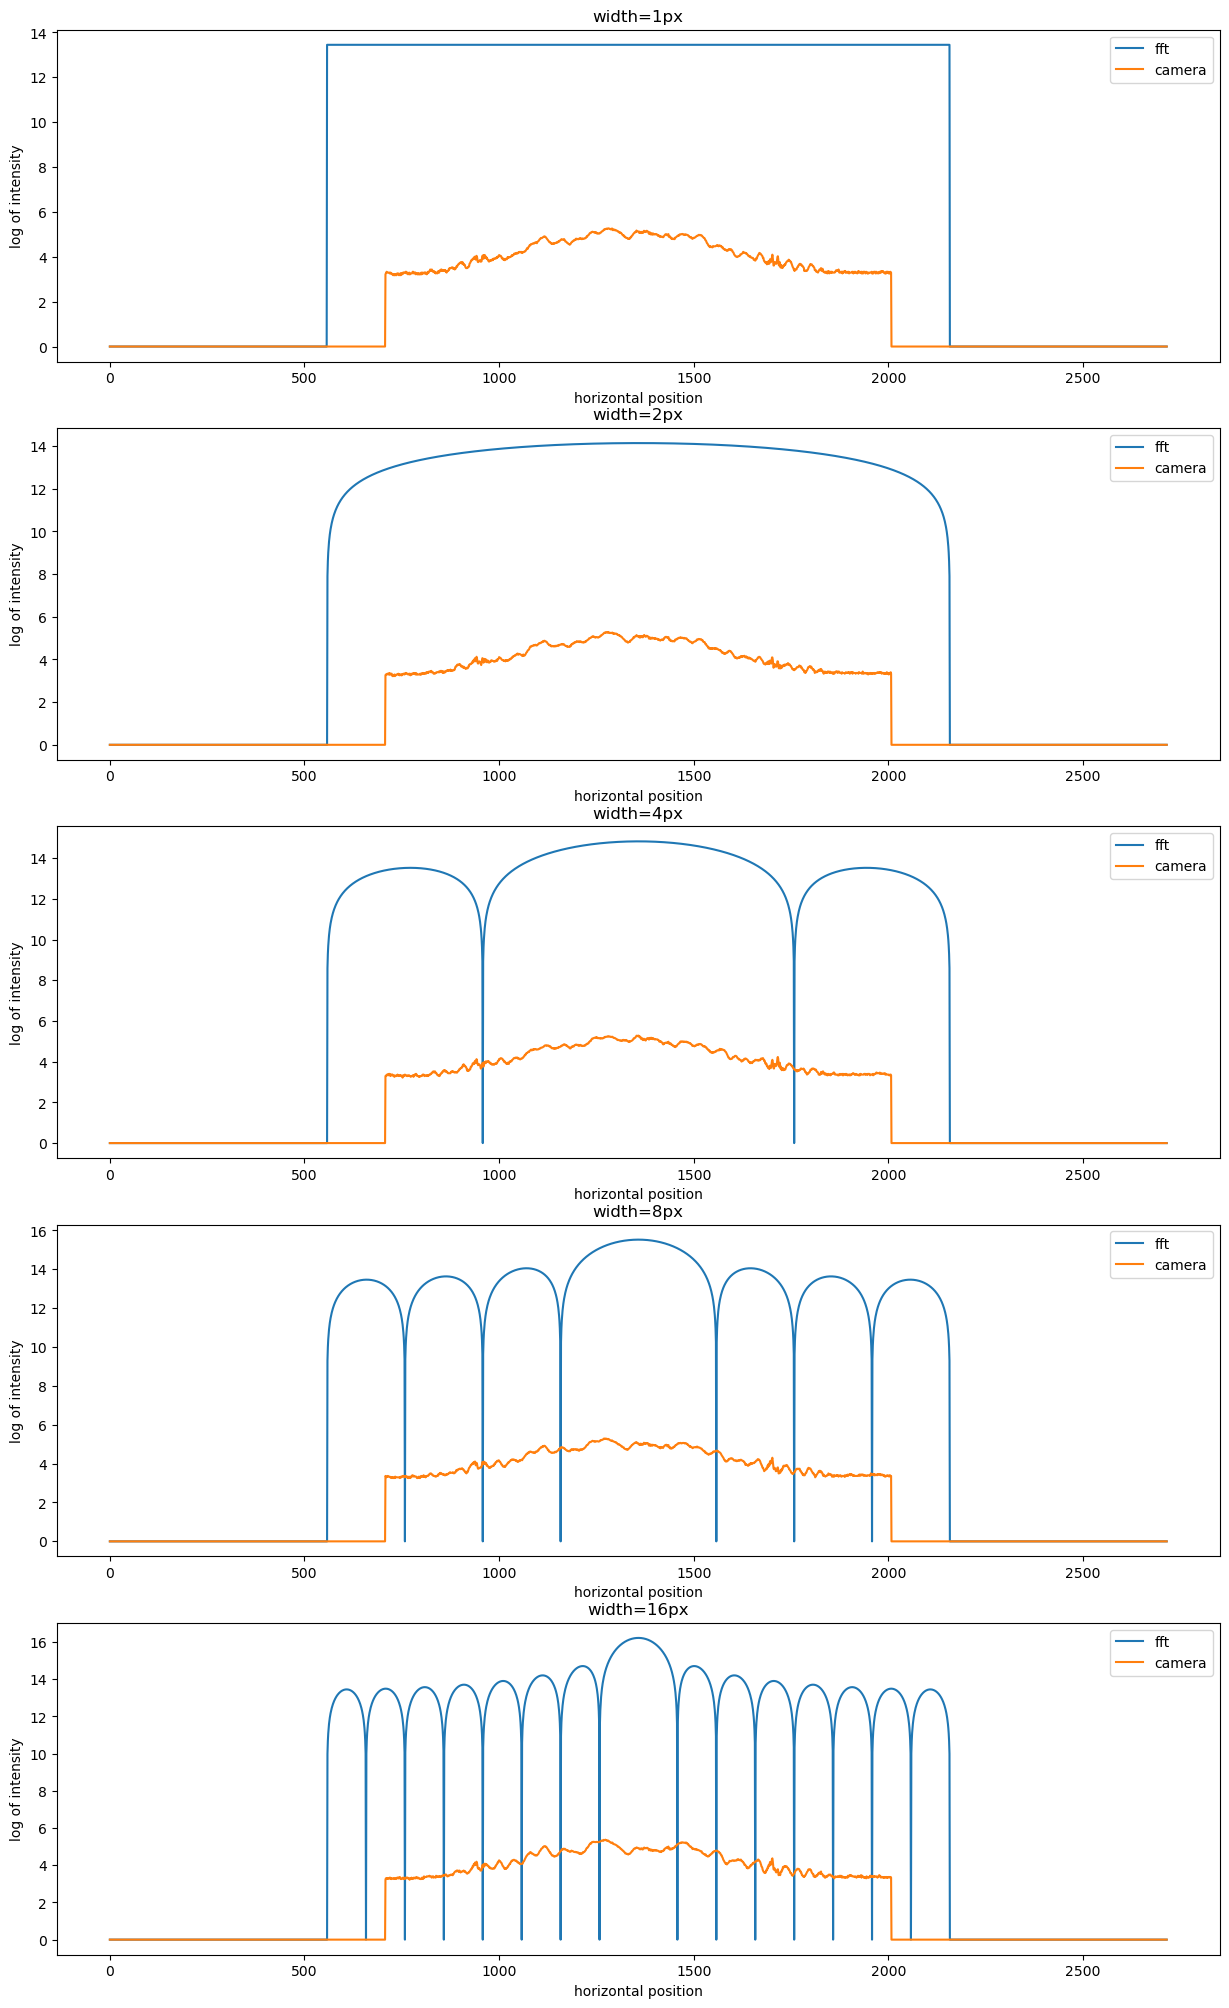

In [389]:
## five plots for each width with comparison of fft and camera
fig, axs = plt.subplots(5, 1, figsize=(15, 25))
for i in range(5):
    axs[i].plot(np.log(fft_verts[i] + 1), label='fft')
    axs[i].plot(np.log(cam_horizons[i] + 1), label='camera')
    axs[i].set_title(f'width={pow(2, i)}px')
    axs[i].legend()
    axs[i].set_xlabel('horizontal position')
    axs[i].set_ylabel('log of intensity')
plt.show()

In [295]:
# central one fifth of the horizons
fft_horizons_cropped = [horizon[w // 2 - w // 12: w // 2 + w // 12] for horizon in fft_horizons]

/var/folders/4r/xpql1tx54qvg4kzb9d3kmpqm0000gn/T/ipykernel_7981/193350231.py:5: RuntimeWarning: divide by zero encountered in log
  axs[i].plot(np.arange(fft_horizons_cropped[0].shape[0]) * 6, np.log(fft_horizons_cropped[i]), label='fft')
/var/folders/4r/xpql1tx54qvg4kzb9d3kmpqm0000gn/T/ipykernel_7981/193350231.py:6: RuntimeWarning: divide by zero encountered in log
  axs[i].plot(np.log(cam_horizons[i]), label='camera')


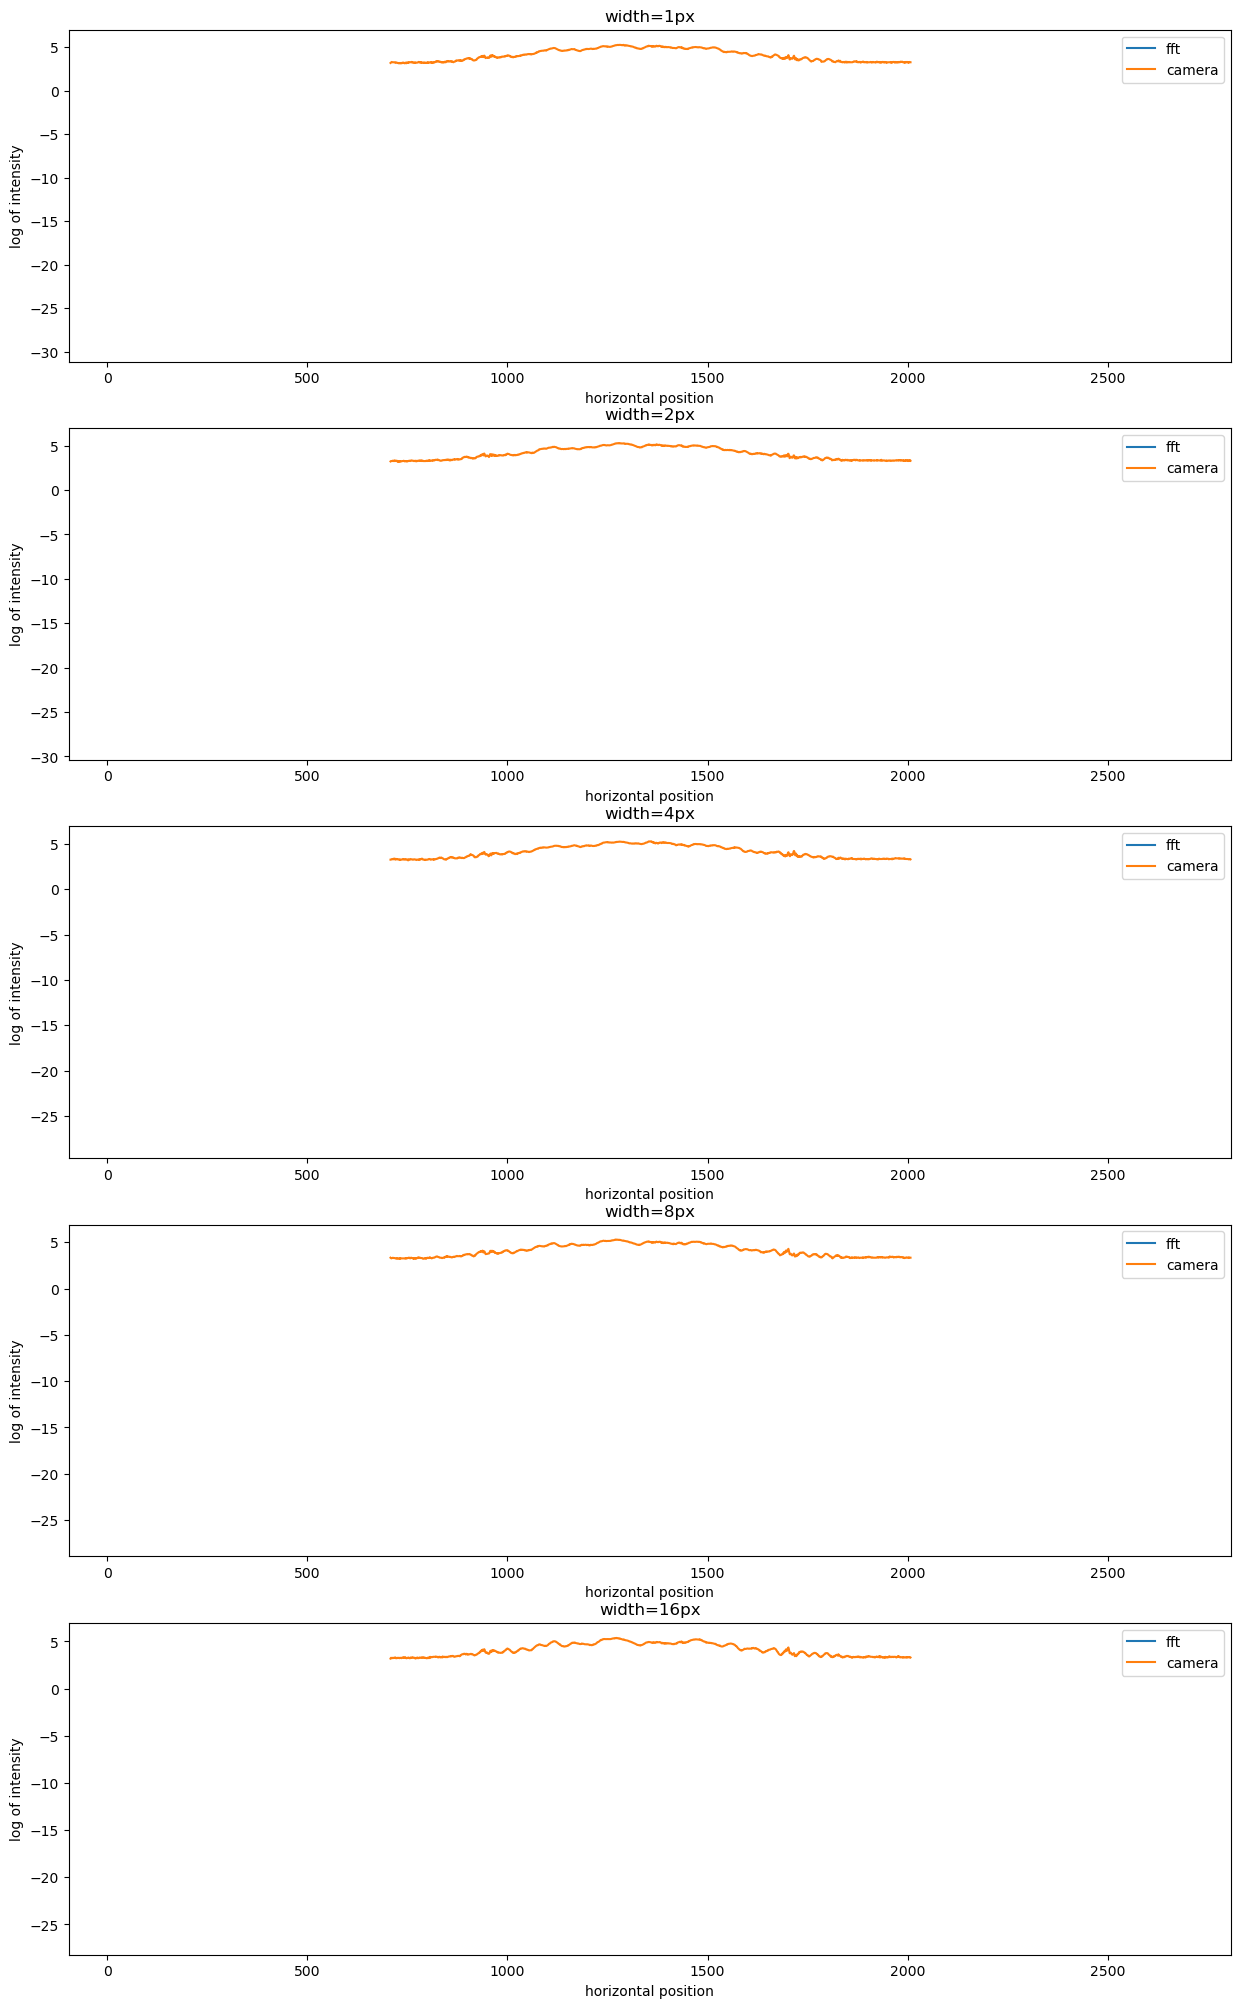

In [390]:
## five plots for each width with comparison of fft and camera
fig, axs = plt.subplots(5, 1, figsize=(15, 25))
for i in range(5):
    # plot two horizons using different scales
    axs[i].plot(np.arange(fft_horizons_cropped[0].shape[0]) * 6, np.log(fft_horizons_cropped[i]), label='fft')
    axs[i].plot(np.log(cam_horizons[i]), label='camera')
    axs[i].set_title(f'width={pow(2, i)}px')
    axs[i].legend()
    axs[i].set_xlabel('horizontal position')
    axs[i].set_ylabel('log of intensity')
plt.show()